## Homeruns in American Baseball League

In [1]:
import json 
import pandas as pd 
import numpy as np 
import math 
import itertools 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
from load_dataset import TimeSeries 

In [2]:
# True labels
annotations = pd.read_json('TCPD-master/annotations.json')
annotations[['homeruns']]

,homeruns
6,"[18, 60]"
7,[68]
8,[60]
9,"[18, 41, 45, 60, 68, 86, 95]"
10,[]
12,NaN
13,NaN
14,NaN


In [3]:
# List true changepoints
annotator_df = pd.read_json('TCPD-master/annotations.json') 
homeruns_df = annotator_df[['homeruns']] 
list2d = np.array(homeruns_df).flatten() 
list2d = [l for l in list2d if (type(l)==list)] 
homeruns_annotation_lst = list(itertools.chain.from_iterable(list2d))
homeruns_annotation_lst

[18, 60, 68, 60, 18, 41, 45, 60, 68, 86, 95]

In [10]:
print(homeruns_df[60:96])

     t  American League Home Runs  date  is_CPD       time
60  60                     1534.0  1961       1 1961-01-01
61  61                     1552.0  1962       0 1962-01-01
62  62                     1489.0  1963       0 1963-01-01
63  63                     1551.0  1964       0 1964-01-01
64  64                     1370.0  1965       0 1965-01-01
65  65                     1365.0  1966       0 1966-01-01
66  66                     1197.0  1967       0 1967-01-01
67  67                     1104.0  1968       0 1968-01-01
68  68                     1649.0  1969       1 1969-01-01
69  69                     1746.0  1970       0 1970-01-01
70  70                     1484.0  1971       0 1971-01-01
71  71                     1175.0  1972       0 1972-01-01
72  72                     1552.0  1973       0 1973-01-01
73  73                     1369.0  1974       0 1974-01-01
74  74                     1465.0  1975       0 1975-01-01
75  75                     1122.0  1976       0 1976-01-

t                              int64
American League Home Runs    float64
date                          object
dtype: object


<Figure size 960x480 with 0 Axes>

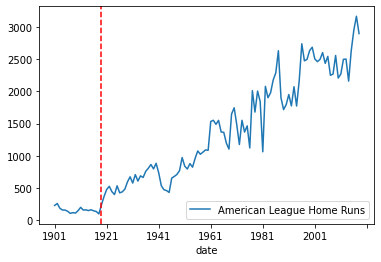

In [6]:
# Plot true changepoints
from load_dataset import TimeSeries
ts = TimeSeries.from_json('TCPD-master/datasets/homeruns/homeruns.json')
homeruns_df = ts.df
homeruns_df['date'] =ts.datestr
print(homeruns_df.dtypes)
figure(figsize=(12, 6), dpi=80)
homeruns_df.plot('date', 'American League Home Runs')
homeruns_df['is_CPD'] = np.where(homeruns_df.t.isin(homeruns_annotation_lst), 1,0)
plt.axvline(homeruns_df.loc[homeruns_df['is_CPD']==1][['t']].values[0], color='red', linestyle='--')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "known_prec_multiplier". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "cp_prior". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.



total changepoints-->  2


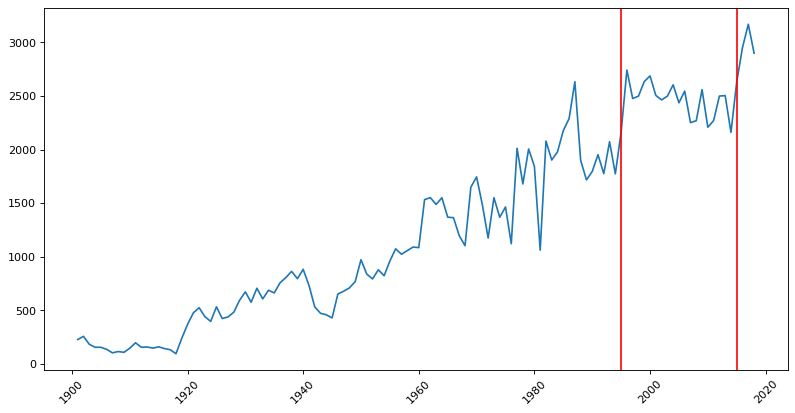

In [7]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters
from kats.consts import TimeSeriesData

df = homeruns_df
df['time']= pd.to_datetime(df['date'])


tsd = TimeSeriesData(df.loc[:,['time','American League Home Runs']])

# Initialize the detector
detector = BOCPDetector(tsd)


changepoints = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL, # this is the default choice
    #model_parameters=[known_prec_multiplier=1.0]
    lag=10,
    changepoint_prior=.5,#prior belief
    threshold=.5
)

print('total changepoints--> ', len(changepoints))

figure(figsize=(12, 6), dpi=80)
# Plot the data
plt.xticks(rotation=45)
detector.plot(changepoints)
plt.show()

In [8]:
changepoints

[(TimeSeriesChangePoint(start_time: 1995-01-01T00:00:00.000000000, end_time: 1995-01-01T00:00:00.000000000, confidence: 0.8384481907695163),
  <kats.detectors.bocpd.BOCPDMetadata at 0x7fb494760160>),
 (TimeSeriesChangePoint(start_time: 2015-01-01T00:00:00.000000000, end_time: 2015-01-01T00:00:00.000000000, confidence: 0.5333473816989451),
  <kats.detectors.bocpd.BOCPDMetadata at 0x7fb494760040>)]

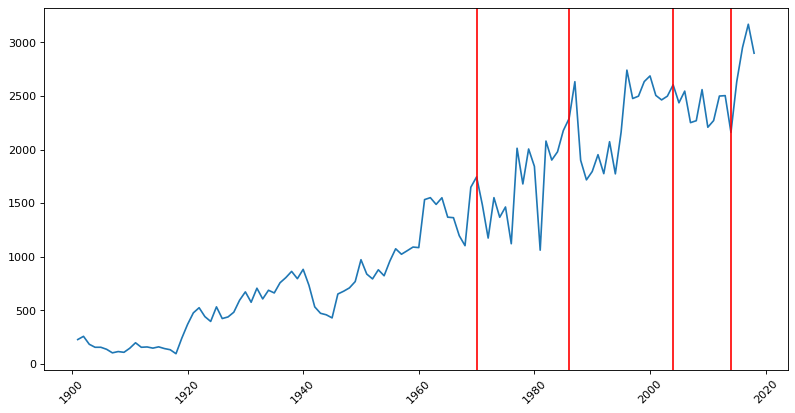

In [19]:
#Robust Stat Detector
from kats.detectors.robust_stat_detection import RobustStatDetector

detector = RobustStatDetector(tsd)
change_points = detector.detector(comparison_window=10, smoothing_window_size=10, p_value_cutoff=0.05)
figure(figsize=(12, 6), dpi=80)
plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

In [12]:
change_points

[(TimeSeriesChangePoint(start_time: 1945-01-01T00:00:00.000000000, end_time: 1945-01-01T00:00:00.000000000, confidence: 0.9786191719905817),
  <kats.detectors.robust_stat_detection.RobustStatMetadata at 0x7fb4947842b0>),
 (TimeSeriesChangePoint(start_time: 1965-01-01T00:00:00.000000000, end_time: 1965-01-01T00:00:00.000000000, confidence: 0.9560543925826888),
  <kats.detectors.robust_stat_detection.RobustStatMetadata at 0x7fb494784a90>),
 (TimeSeriesChangePoint(start_time: 1987-01-01T00:00:00.000000000, end_time: 1987-01-01T00:00:00.000000000, confidence: 0.9685858134916419),
  <kats.detectors.robust_stat_detection.RobustStatMetadata at 0x7fb494784490>),
 (TimeSeriesChangePoint(start_time: 1992-01-01T00:00:00.000000000, end_time: 1992-01-01T00:00:00.000000000, confidence: 0.9917613626142542),
  <kats.detectors.robust_stat_detection.RobustStatMetadata at 0x7fb494784400>),
 (TimeSeriesChangePoint(start_time: 1998-01-01T00:00:00.000000000, end_time: 1998-01-01T00:00:00.000000000, confiden

total changepoints-->  1


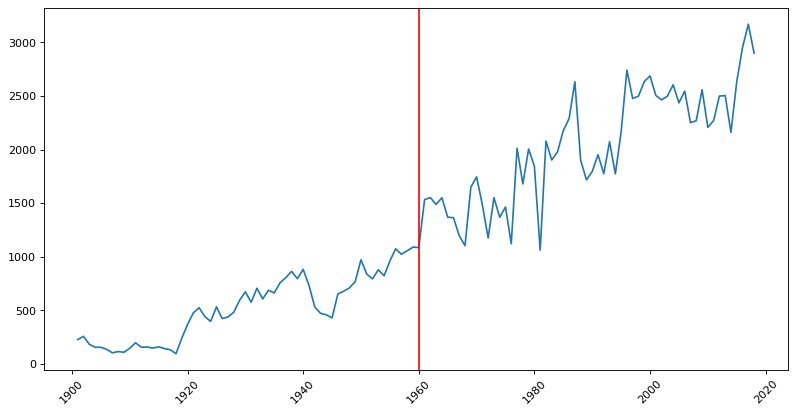

In [20]:
# CUSUM
from kats.detectors.cusum_detection import CUSUMDetector


# Initialize the detector
detector = CUSUMDetector(tsd)

change_points = detector.detector(threshold=0.05)

print('total changepoints--> ', len(change_points))

figure(figsize=(12, 6), dpi=80)
# Plot the data
plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

In [21]:
change_points

[(TimeSeriesChangePoint(start_time: 1960-01-01 00:00:00, end_time: 1960-01-01 00:00:00, confidence: 1.0),
  <kats.detectors.cusum_detection.CUSUMMetadata at 0x7fb48b4256d0>)]

#### Annotation -> 1961, 1969
#### BOCPD -> 1995, 2015
#### RobustStatDetector -> 1945, 1965, 1987, 1992, 1998
#### CUSUM -> 1960